<a href="https://colab.research.google.com/github/jan3011/Prediction-of-Parkinson-disease/blob/master/Random_Forest_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving predictive1.csv to predictive1 (7).csv


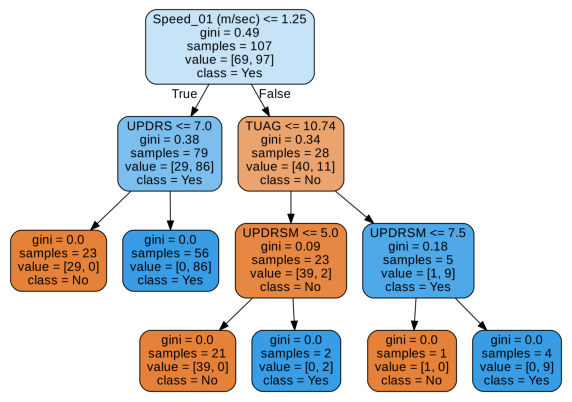

In [0]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
df=files.upload()
df=pd.read_csv('demographics (2).csv')
df=df[['Gender','Age','Height (meters)','Weight (kg)','HoehnYahr','UPDRS','UPDRSM','TUAG','Speed_01 (m/sec)','Speed_10','Target']]
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df['HoehnYahr'].fillna(df.groupby('Target')['HoehnYahr'].transform("median"),inplace=True)
df['UPDRS'].fillna(df.groupby('Target')['UPDRS'].transform("median"),inplace=True)
df['Speed_10'].fillna(df.groupby('Target')['Speed_10'].transform("median"),inplace=True)
df['Height (meters)'].fillna(df.groupby('Target')['Height (meters)'].transform("median"),inplace=True)
df['Weight (kg)'].fillna(df.groupby('Target')['Weight (kg)'].transform("median"),inplace=True)
df['UPDRSM'].fillna(df.groupby('Target')['UPDRSM'].transform("median"),inplace=True)
df['TUAG'].fillna(df.groupby('Target')['TUAG'].transform("median"),inplace=True)
df['Speed_01 (m/sec)'].fillna(df.groupby('Target')['Speed_01 (m/sec)'].transform("median"),inplace=True)
feature_cols = ['Gender','Age','Height (meters)','Weight (kg)','HoehnYahr','UPDRS','UPDRSM','TUAG','Speed_01 (m/sec)','Speed_10']
model = RandomForestClassifier(max_depth = 3, n_estimators=10)
X = df[feature_cols] # Features
y = df.Target # Target variable
model.fit(X, y)
estimator = model.estimators_[5]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names =feature_cols,
                class_names = ['No','Yes'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 14))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();